In [1]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
### Set-up - Define file location
from google.colab import drive

### Access Google Drive and importing 
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path = '/content/notebooks'
colab_nb_path = '/content/mnt/My Drive/Colab Notebooks Hyunho Mo'
current_dir = colab_nb_path +'/N-CMAPSS/'
filename = 'N-CMAPSS_DS02-006.h5'
filepath = current_dir + filename

Mounted at /content/mnt


In [2]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
'''
W: operative conditions (Scenario descriptors)
X_s: measured signals
X_v: virtual sensors
T(theta): engine health parameters
Y: RUL [in cycles]
A: auxiliary data
'''

with h5py.File(filepath, 'r') as hdf:
        # Development(training) set
        W_dev = np.array(hdf.get('W_dev'))             # W 
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print ("number of training samples(timestamps): ", Y_dev.shape[0])
print ("number of training samples(timestamps): ", Y_test.shape[0])
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("Y shape: " + str(Y.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.06899771294999998
number of training samples(timestamps):  5263447
number of training samples(timestamps):  1253743

W shape: (6517190, 4)
X_s shape: (6517190, 14)
X_v shape: (6517190, 14)
T shape: (6517190, 10)
Y shape: (6517190, 1)
A shape: (6517190, 4)


A[0], unit number:  [ 2.  2.  2. ... 15. 15. 15.]
A[0], Flight cycle number:  [ 1.  1.  1. ... 67. 67. 67.]
Y, RUL:  [[74]
 [74]
 [74]
 ...
 [ 0]
 [ 0]
 [ 0]]
A[0], Flight class:  [3. 3. 3. ... 2. 2. 2.]
A[0], Health state:  [1. 1. 1. ... 0. 0. 0.]
Engine units in df:  [ 2.  5. 10. 11. 14. 15. 16. 18. 20.]


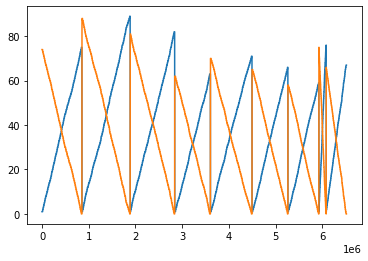

In [3]:
'''
A(auxiliary data) specification
'''
print ("A[0], unit number: ", A.T[0])
print ("A[0], Flight cycle number: ", A.T[1])
print ("Y, RUL: ", Y)
print ("A[0], Flight class: ", A.T[2])
print ("A[0], Health state: ", A.T[3])


df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

print('Engine units in df: ', np.unique(df_A['unit']))


import matplotlib.pyplot as plt
plt.plot (df_A['cycle'])
plt.plot (Y)

In [4]:
'''
Illusration of Multivariate time-series of condition monitoring sensors readings for Unit5 (fifth engine)

W: operative conditions (Scenario descriptors) - ['alt', 'Mach', 'TRA', 'T2']
X_s: measured signals - ['T24', 'T30', 'T48', 'T50', 'P15', 'P2', 'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf']
X_v: virtual sensors - ['T40', 'P30', 'P45', 'W21', 'W22', 'W25', 'W31', 'W32', 'W48', 'W50', 'SmFan', 'SmLPC', 'SmHPC', 'phi']
T(theta): engine health parameters - ['fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod', 'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod', 'LPT_eff_mod', 'LPT_flow_mod']
Y: RUL [in cycles]
A: auxiliary data - ['unit', 'cycle', 'Fc', 'hs']
'''
# W_var = list(np.array(W_var, dtype='U20'))
# X_s_var = list(np.array(X_s_var, dtype='U20'))  
# X_v_var = list(np.array(X_v_var, dtype='U20')) 
# T_var = list(np.array(T_var, dtype='U20'))
# A_var = list(np.array(A_var, dtype='U20'))
                          
df_W = DataFrame(data=W, columns=W_var)
df_Xs = DataFrame(data=X_s, columns=X_s_var)
df_Xv = DataFrame(data=X_v, columns=X_v_var)
df_T = DataFrame(data=T, columns=T_var)
df_Y = DataFrame(data=Y, columns=['RUL'])
df_A = DataFrame(data=A, columns=A_var)



In [5]:
# unit_array = df_A['unit']
# print (unit_array)
# print (type(unit_array))
# print (type(unit_array[0]))

df_all = pd.concat([df_W, df_Xs, df_Xv, df_T, df_Y, df_A], axis=1)
print (df_all)

df_u5 = df_all[df_all['unit'] == np.float64(5.0) ]
print (df_u5)

             alt      Mach        TRA          T2  ...  unit  cycle   Fc   hs
0        10005.0  0.448497  76.903748  502.420918  ...   2.0    1.0  3.0  1.0
1        10013.0  0.447741  76.903748  502.326114  ...   2.0    1.0  3.0  1.0
2        10017.0  0.448938  77.079529  502.416067  ...   2.0    1.0  3.0  1.0
3        10024.0  0.449883  77.079529  502.469893  ...   2.0    1.0  3.0  1.0
4        10031.0  0.449379  77.079529  502.401271  ...   2.0    1.0  3.0  1.0
...          ...       ...        ...         ...  ...   ...    ...  ...  ...
6517185  10027.0  0.382473  25.136539  497.040848  ...  15.0   67.0  2.0  0.0
6517186  10022.0  0.382158  25.136539  497.035821  ...  15.0   67.0  2.0  0.0
6517187  10016.0  0.381969  25.136539  497.043961  ...  15.0   67.0  2.0  0.0
6517188  10010.0  0.381717  25.136539  497.047255  ...  15.0   67.0  2.0  0.0
6517189  10003.0  0.381402  25.136539  497.049793  ...  15.0   67.0  2.0  0.0

[6517190 rows x 47 columns]
             alt      Mach        T

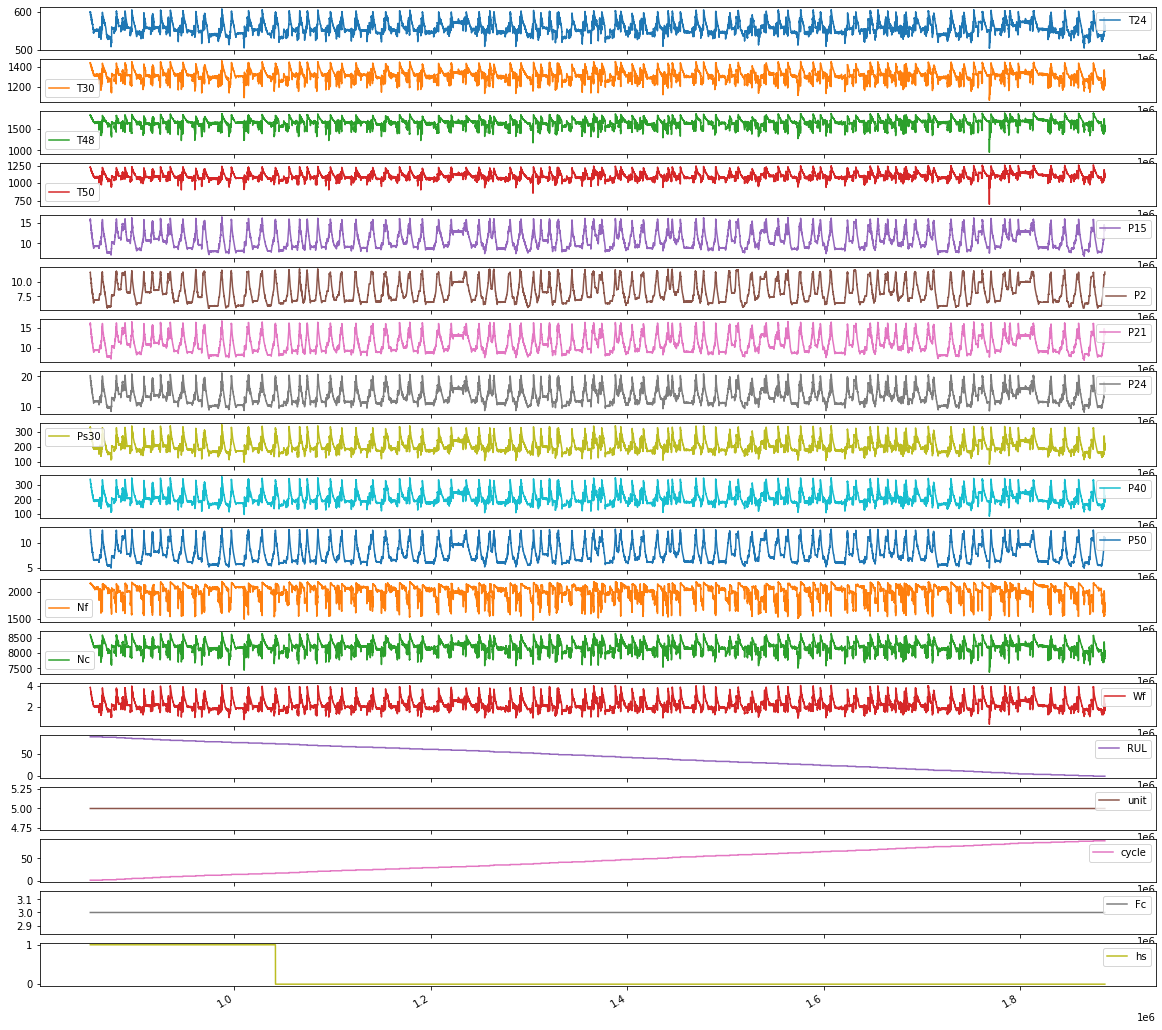

In [6]:
# # cols_features = [c for c in train_FD001.columns if c.startswith('o') or c.startswith('s')]
# t = df_u5[X_s_var + ['RUL'] + A_var].plot(subplots=True, figsize=(20, 20))

            alt      Mach        TRA          T2  ...  unit  cycle   Fc   hs
853142  10011.0  0.452529  77.255310  502.749897  ...   5.0    1.0  3.0  1.0
853143  10004.0  0.448812  77.255310  502.452886  ...   5.0    1.0  3.0  1.0
853144  10019.0  0.449820  77.255310  502.483455  ...   5.0    1.0  3.0  1.0
853145  10023.0  0.449190  77.255310  502.414549  ...   5.0    1.0  3.0  1.0
853146  10030.0  0.448182  77.255310  502.301181  ...   5.0    1.0  3.0  1.0
...         ...       ...        ...         ...  ...   ...    ...  ...  ...
865480  10025.0  0.452970  44.384449  502.736014  ...   5.0    1.0  3.0  1.0
865481  10018.0  0.452907  44.384449  502.756971  ...   5.0    1.0  3.0  1.0
865482  10013.0  0.452907  44.384449  502.776051  ...   5.0    1.0  3.0  1.0
865483  10009.0  0.453033  44.384449  502.800892  ...   5.0    1.0  3.0  1.0
865484  10004.0  0.452844  44.384449  502.803433  ...   5.0    1.0  3.0  1.0

[12343 rows x 37 columns]
           alt      Mach        TRA          T2  

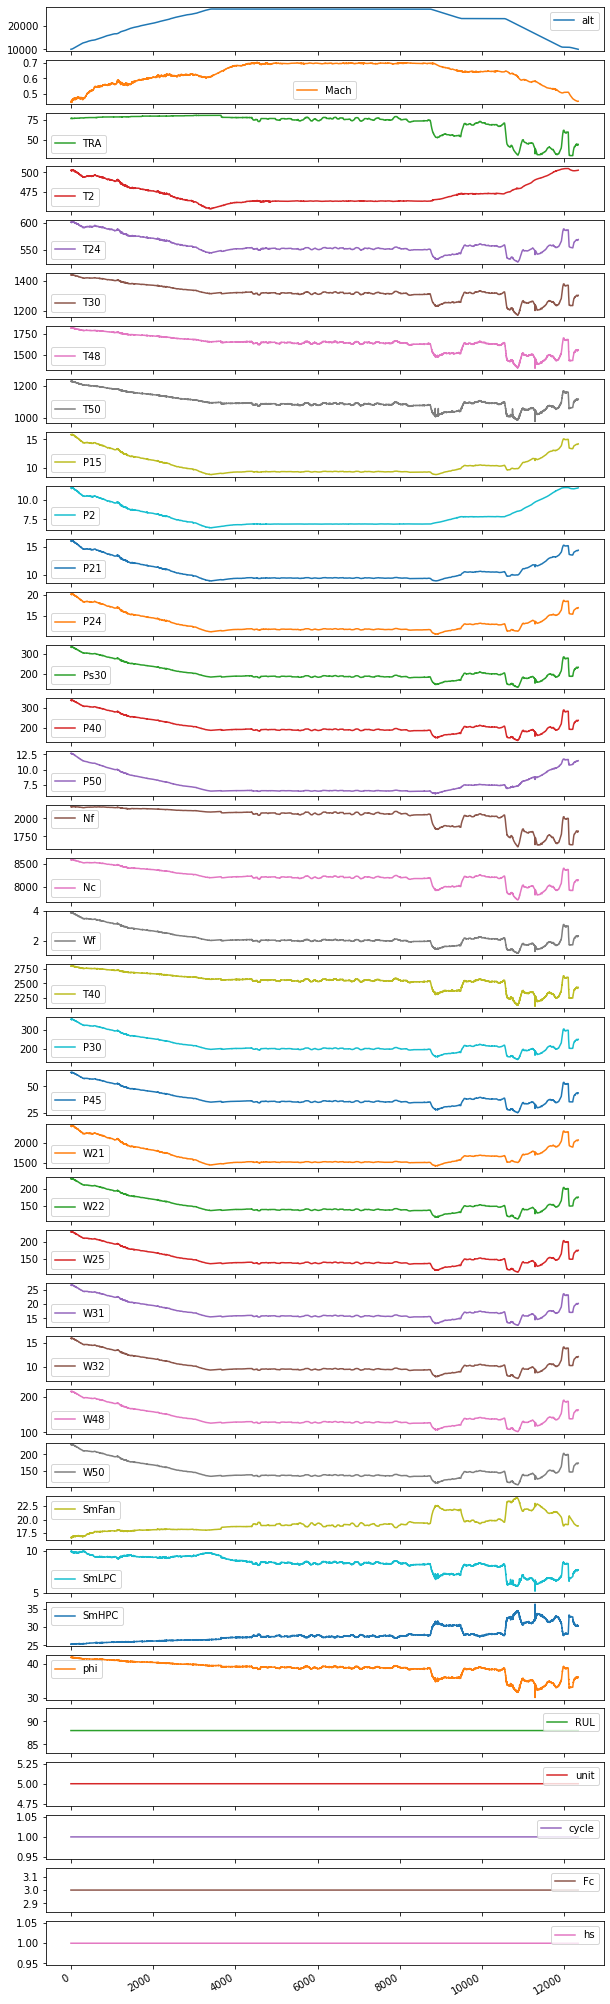

In [7]:
# # cols_features = [c for c in train_FD001.columns if c.startswith('o') or c.startswith('s')]
# df_u5_c1 = df_u5[df_u5['cycle'] == np.float64(1.0) ]
# df_u5_c1 = df_u5_c1.drop(columns=T_var )
# print (df_u5_c1)
# df_u5_c1 = df_u5_c1.reset_index(drop=True)
# print (df_u5_c1)

# t = df_u5_c1.plot(subplots=True, figsize=(10, 40))

            alt      Mach        TRA          T2  ...  unit  cycle   Fc   hs
853142  10011.0  0.452529  77.255310  502.749897  ...   5.0    1.0  3.0  1.0
853143  10004.0  0.448812  77.255310  502.452886  ...   5.0    1.0  3.0  1.0
853144  10019.0  0.449820  77.255310  502.483455  ...   5.0    1.0  3.0  1.0
853145  10023.0  0.449190  77.255310  502.414549  ...   5.0    1.0  3.0  1.0
853146  10030.0  0.448182  77.255310  502.301181  ...   5.0    1.0  3.0  1.0
...         ...       ...        ...         ...  ...   ...    ...  ...  ...
879655  10020.0  0.454671  43.857109  502.904251  ...   5.0    2.0  3.0  1.0
879656  10017.0  0.454860  43.857109  502.931924  ...   5.0    2.0  3.0  1.0
879657  10013.0  0.454860  43.857109  502.949069  ...   5.0    2.0  3.0  1.0
879658  10009.0  0.455994  43.857109  503.059114  ...   5.0    2.0  3.0  1.0
879659  10005.0  0.456498  43.857109  503.120691  ...   5.0    2.0  3.0  1.0

[26518 rows x 37 columns]
           alt      Mach        TRA          T2  

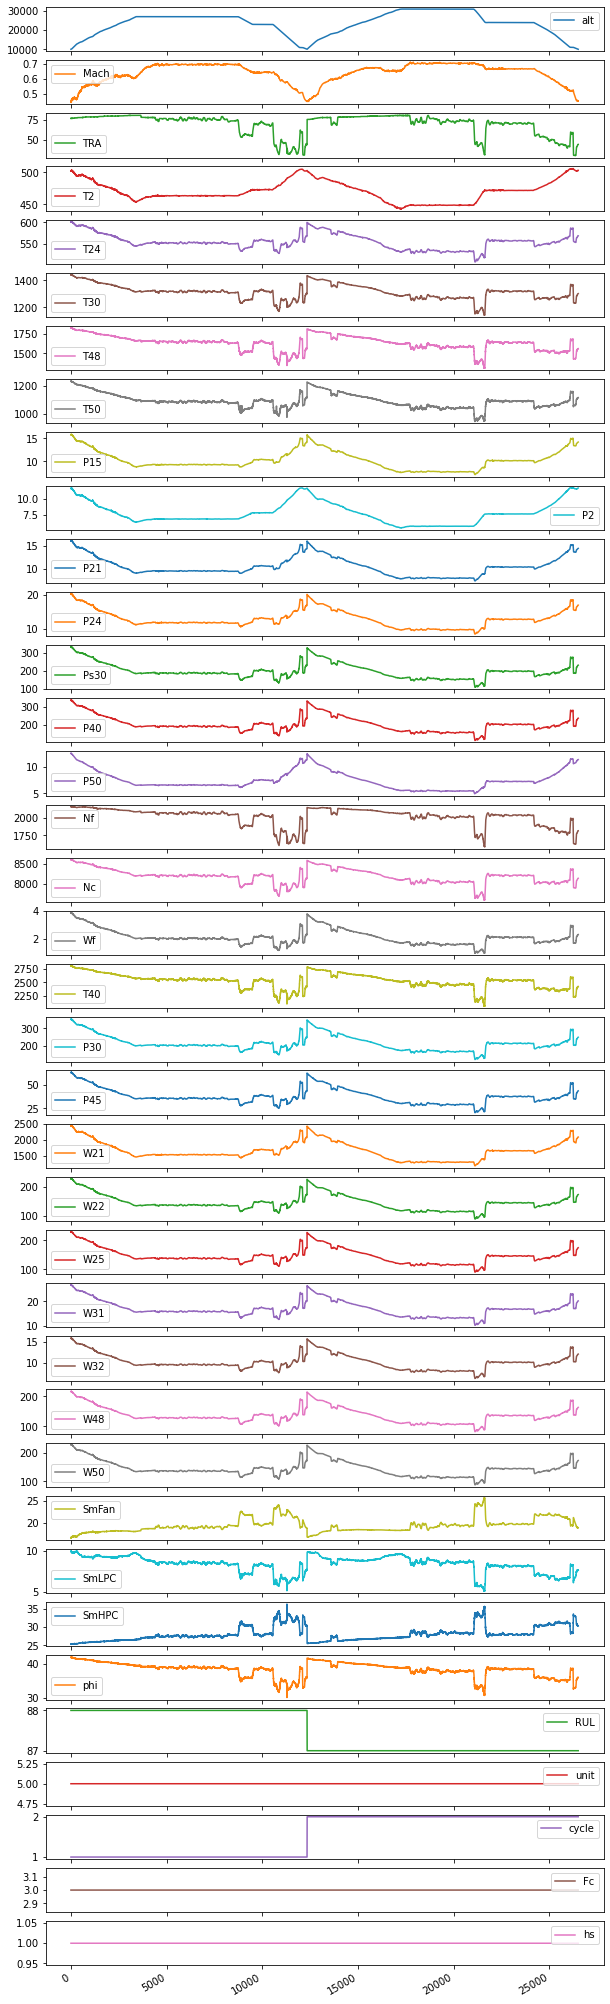

In [8]:
df_u5_c1 = df_u5[df_u5['cycle'] == np.float64(1.0) ]
df_u5_c1 = df_u5_c1.drop(columns=T_var )
df_u5_c2 = df_u5[df_u5['cycle'] == np.float64(2.0) ]
df_u5_c2 = df_u5_c2.drop(columns=T_var )
df_u5_c12 = pd.concat([df_u5_c1, df_u5_c2])

print (df_u5_c12)
df_u5_c12 = df_u5_c12.reset_index(drop=True)
print (df_u5_c12)
t = df_u5_c12.plot(subplots=True, figsize=(10, 40))

In [9]:
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

Unit: 2.0 - Number of flight cyles (t_{EOF}):  75
Unit: 5.0 - Number of flight cyles (t_{EOF}):  89
Unit: 10.0 - Number of flight cyles (t_{EOF}):  82
Unit: 11.0 - Number of flight cyles (t_{EOF}):  59
Unit: 14.0 - Number of flight cyles (t_{EOF}):  76
Unit: 15.0 - Number of flight cyles (t_{EOF}):  67
Unit: 16.0 - Number of flight cyles (t_{EOF}):  63
Unit: 18.0 - Number of flight cyles (t_{EOF}):  71
Unit: 20.0 - Number of flight cyles (t_{EOF}):  66


In [10]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1 train': 'C0', 'Unit 2 train': 'C1', 'Unit 3 train': 'C2', 'Unit 4 train': 'C3', 'Unit 5 train': 'C4', 'Unit 6 train': 'C5',
                      'Unit 7 train': 'C6', 'Unit 8 train': 'C7', 'Unit 9 train': 'C8', 'Unit 10 train': 'C9', 'Unit 11 test': 'C10',
                      'Unit 12 train': 'C11', 'Unit 13 train': 'C12', 'Unit 14 test': 'C13', 'Unit 15 test': 'C14', 'Unit 16 train': 'C15',
                      'Unit 17 train': 'C16', 'Unit 18 train': 'C17', 'Unit 19 train': 'C18', 'Unit 20 train': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()

Unit: 2.0 - Number of flight cyles (t_{EOF}):  75
Unit: 5.0 - Number of flight cyles (t_{EOF}):  89
Unit: 10.0 - Number of flight cyles (t_{EOF}):  82
Unit: 11.0 - Number of flight cyles (t_{EOF}):  59
Unit: 14.0 - Number of flight cyles (t_{EOF}):  76
Unit: 15.0 - Number of flight cyles (t_{EOF}):  67
Unit: 16.0 - Number of flight cyles (t_{EOF}):  63
Unit: 18.0 - Number of flight cyles (t_{EOF}):  71
Unit: 20.0 - Number of flight cyles (t_{EOF}):  66
{'Unit 2': 11375, 'Unit 5': 11611, 'Unit 10': 11618, 'Unit 11': 11245, 'Unit 14': 2062, 'Unit 15': 6469, 'Unit 16': 12147, 'Unit 18': 12545, 'Unit 20': 11638}


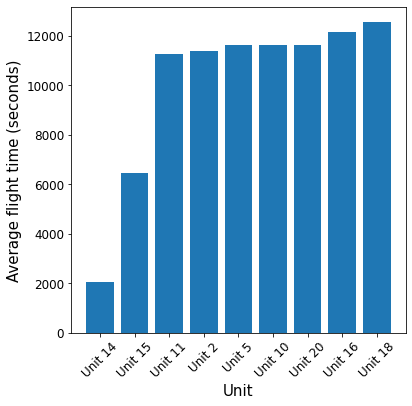

<Figure size 432x288 with 0 Axes>

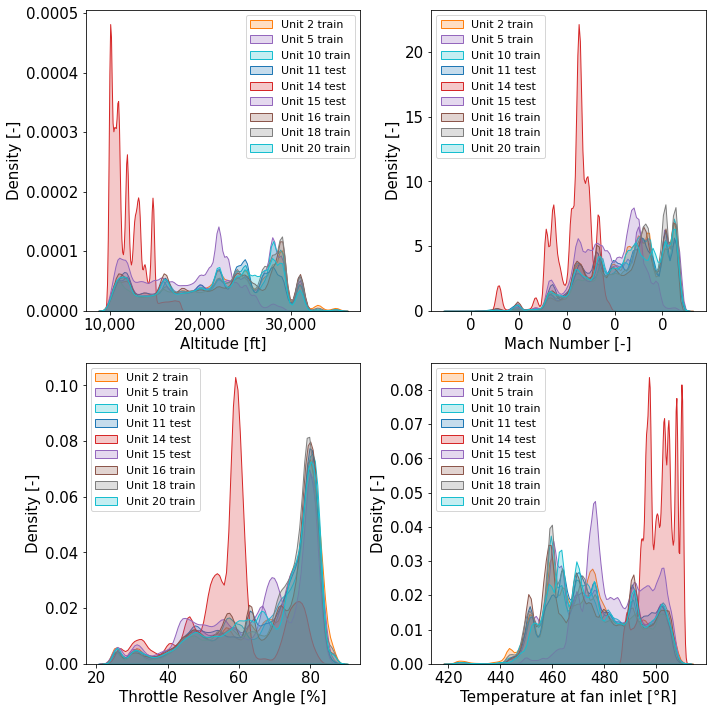

In [22]:
# Average flgiht time per cycle (flight)
avg_time_dict = {}

for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

    temp_num_cycles = len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle']))
    df_unit_temp =  df_all[df_all['unit'] == np.float64(i) ]
    temp_avg_time = int(df_unit_temp.shape[0]/temp_num_cycles)
    avg_time_dict['Unit '+ str(int(i))] = temp_avg_time

print (avg_time_dict)
avg_time_dict = dict(sorted(avg_time_dict.items(), key=lambda item: item[1]))

fig = plt.figure(figsize=(6,6))  
plt.bar(list(avg_time_dict.keys()), avg_time_dict.values())
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Average flight time (seconds)' , fontdict = {'fontsize' : 15})
plt.xlabel('Unit' , fontdict = {'fontsize' : 15})
plt.show()

variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = []
for u in units:
  if str(int(u)) == '11' or str(int(u)) == '14' or str(int(u)) == '15':
    leg.append('Unit ' + str(int(u)) + ' test')
  else:
    leg.append('Unit ' + str(int(u)) + ' train')


# leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=15, name='kde_DS02.png')



In [12]:
df_u14 = df_all[df_all['unit'] == np.float64(14.0) ]
print (df_u14)

             alt      Mach        TRA          T2  ...  unit  cycle   Fc   hs
5926942  10006.0  0.475272  77.167419  504.806759  ...  14.0    1.0  1.0  1.0
5926943  10011.0  0.475524  77.167419  504.811407  ...  14.0    1.0  1.0  1.0
5926944  10020.0  0.475965  77.167419  504.818108  ...  14.0    1.0  1.0  1.0
5926945  10025.0  0.476280  77.167419  504.828582  ...  14.0    1.0  1.0  1.0
5926946  10026.0  0.476343  77.167419  504.830873  ...  14.0    1.0  1.0  1.0
...          ...       ...        ...         ...  ...   ...    ...  ...  ...
6083715  10023.0  0.457632  33.573978  503.153948  ...  14.0   76.0  1.0  0.0
6083716  10018.0  0.457380  34.364990  503.150402  ...  14.0   76.0  1.0  0.0
6083717  10013.0  0.457254  35.419670  503.157549  ...  14.0   76.0  1.0  0.0
6083718  10009.0  0.457128  35.507561  503.161430  ...  14.0   76.0  1.0  0.0
6083719  10005.0  0.457128  35.683338  503.176885  ...  14.0   76.0  1.0  0.0

[156778 rows x 47 columns]


In [24]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()


def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

<Figure size 432x288 with 0 Axes>

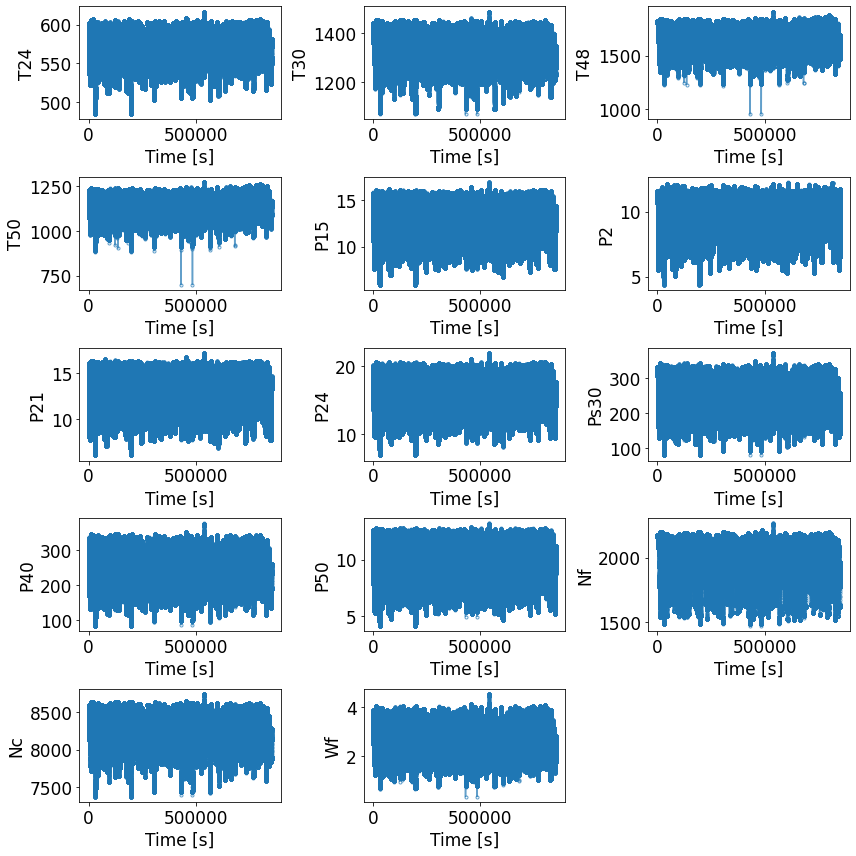

<Figure size 432x288 with 0 Axes>

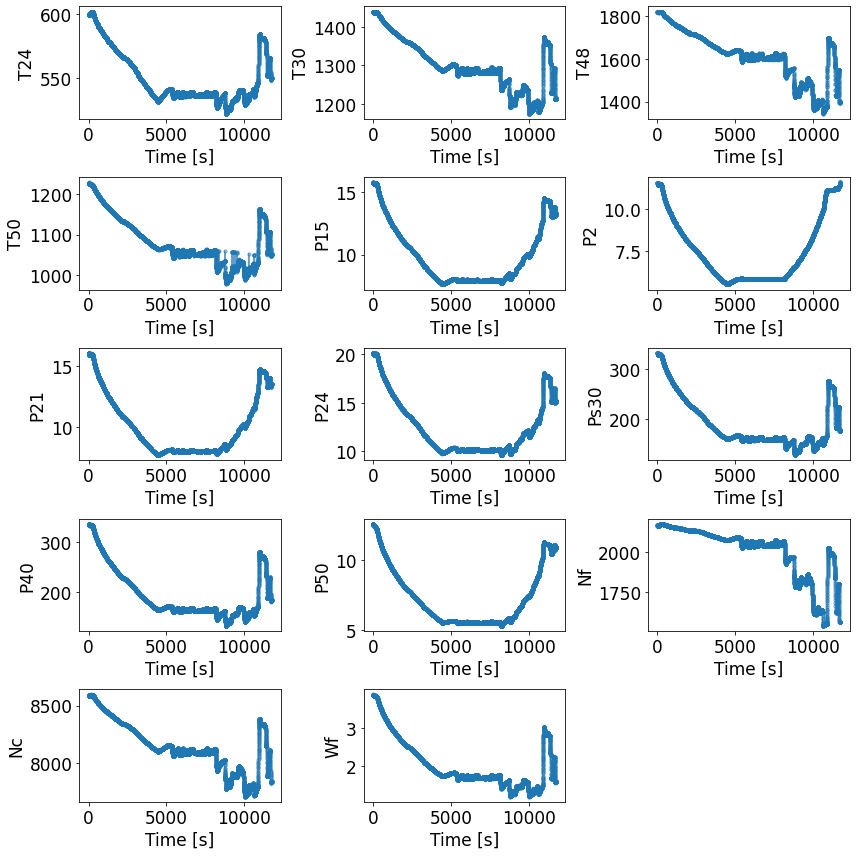

In [27]:
'''
Sensor readings ( Xs ) of Unit 2
'''
df_X_s_u = df_Xs.loc[df_A.unit == 2]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

#Single flight cycle
df_X_s_u_c = df_Xs.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)